In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [12]:

# Initialisation des poids
def initialisation(X):
  W=np.random.randn(X.shape[1], 1)
  b=np.random.randn(1)
  return W,b

# Calcul prédictions
def Model(X, W, b):
  Z = np.dot(X,W)+b
  A = 1/(1+np.exp(-Z))
  return A

# Voir performances
def Cost(A,y):
  L=-1/len(y)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
  return L

# Calcul gradients
def Gradients(A, X, y):
  dl=1/len(y)*np.dot(X.T,(A-y))
  db=1/len(y)*np.sum(A-y)
  return dl, db

# Recalcul des poids
def Update(W, b, dl, db, pas):
  W = W - pas*dl
  b = b + pas*db
  return W,b


In [21]:
def entrainer_neurone(X, y, pas, n_iter):
  i=0;
  Loss=[]

  W,b = initialisation(X);
  for i in range(n_iter):
    A=Model(X, W, b)
    L=Cost(A, y)
    Loss.append(L)
    dl, db=Gradients(A, X, y)
    W,b = Update(W, b, dl, db, pas)

  plt.plot(Loss)
  plt.show()
  return W,b

In [46]:
# Generate dataset
X,y =make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
# Transform y from array to vector
y=y.reshape((y.shape[0], 1))

X.shape, y.shape

((100, 2), (100, 1))

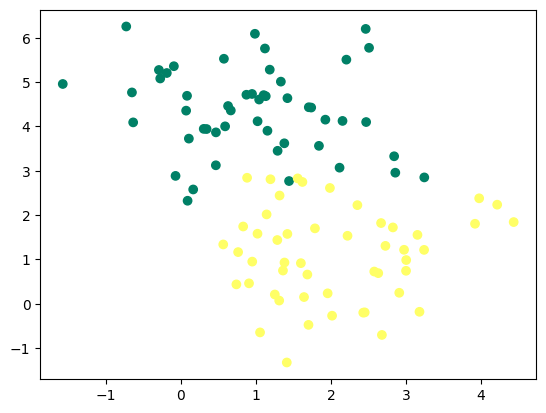

In [47]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')

#Entrainement d'un neurone avec différents nombre d'iter_max

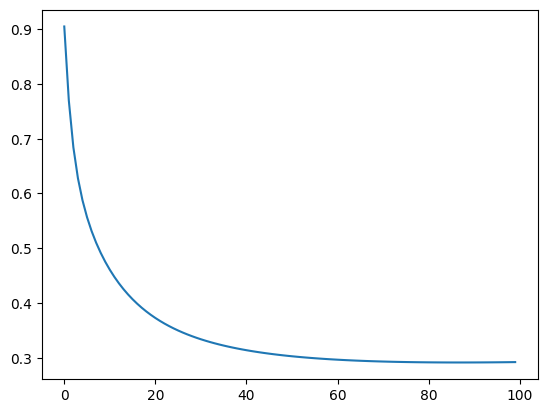

(array([[ 1.31072917],
        [-0.81592414]]),
 array([-0.42612994]),
 0.29198186562279876)

In [13]:
W,b = entrainer_neurone(X, y, 0.1, 100)

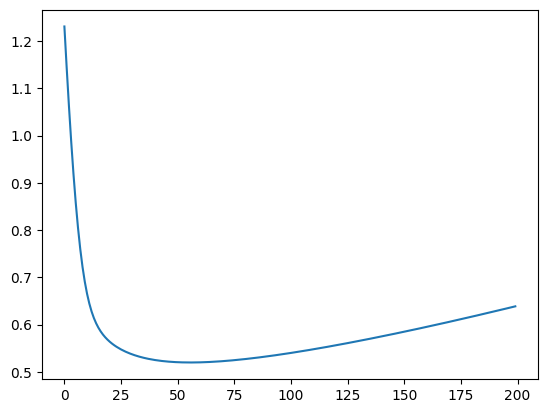

(array([[ 3.30592124],
        [-0.57676121]]),
 array([-4.92139903]),
 0.6387015645218367)

In [14]:
A = entrainer_neurone(X, y, 0.1, 200)

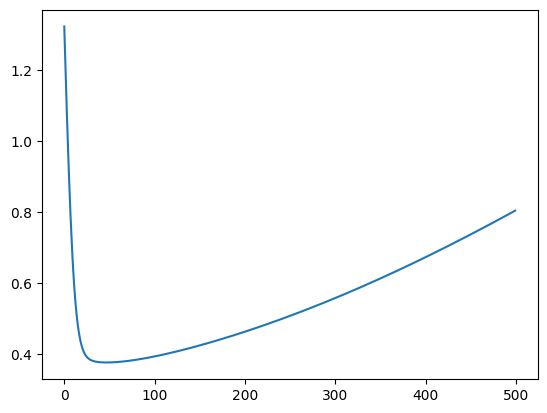

(array([[ 4.5479256 ],
        [-0.72329787]]),
 array([-6.82859966]),
 0.8045565828600314)

In [15]:
W,b = entrainer_neurone(X, y, 0.1, 500)

#Prédictions

In [48]:
def predict(W, X, b):
  A=Model(X, W, b)
  return np.where(A >= 0.5, 1, 0)

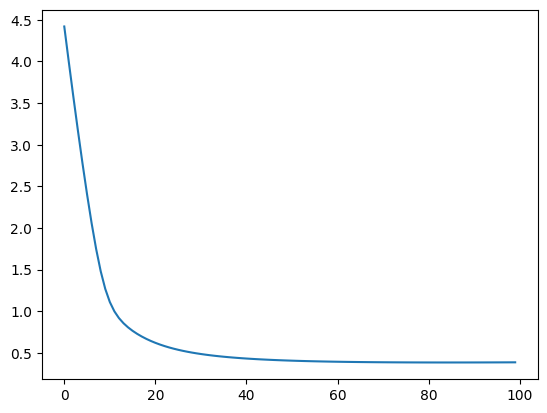

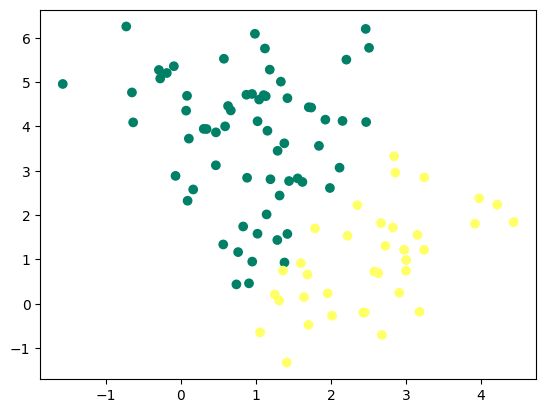

In [49]:
W,b = entrainer_neurone(X, y, 0.1, 100)
y_pred = predict(W, X, b)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='summer')

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8

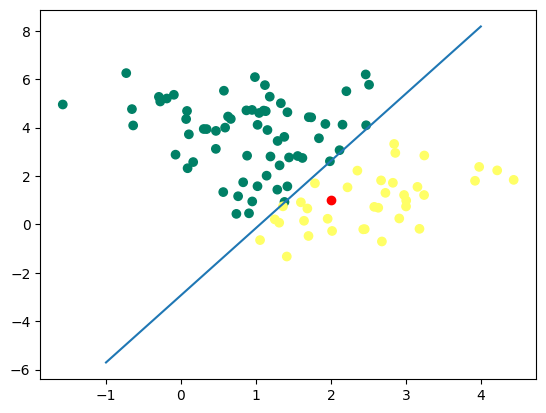

In [51]:
new_plant = np.array([2, 1])
x0=np.linspace(-1,4,100)
x1=-(W[0]*x0+b)/W[1]
plt.plot(x0, x1)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='red')

In [52]:
predict(W, new_plant.reshape(1,2), b)

array([[1]])